### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data to Pandas Dataframe

In [2]:
df = pd.read_csv('Car_sale_ads.csv')
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [3]:
df.shape

(208304, 25)

## 1.1 Check data integrity and clean if neccesary

### Remove unneccesary columns

In [4]:
df = df.drop(['Index'], axis=1)
df.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


### Check for null values

In [5]:
df.isnull().sum()

Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

There are multiple instances of null values over several columns. To enable some basic analysis, NaN values in columns with continuous data will be replaced with the mean value for that column. 

In [6]:
df['Mileage_km'] = df['Mileage_km'].fillna(df['Mileage_km'].mean())
df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].mean())
df.isnull().sum()

Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

# Exploring the Data

First, let's find out which car manufacturer sold the most cars and generated the most revenue.  

In [7]:
brand_count = df['Vehicle_brand'].value_counts()
brand_count.head()

Volkswagen    18455
BMW           16983
Audi          16730
Opel          16322
Ford          16007
Name: Vehicle_brand, dtype: int64

Convert back to a dataframe for use of use.

In [8]:
brand_count = pd.DataFrame({'brand':brand_count.index, 'count':brand_count.values})
brand_count.head()

,brand,count
0,Volkswagen,18455
1,BMW,16983
2,Audi,16730
3,Opel,16322
4,Ford,16007


Looking at the top 10 manufacturers for number of vehicles sold

[Text(0, 0, 'Volkswagen'),
 Text(1, 0, 'BMW'),
 Text(2, 0, 'Audi'),
 Text(3, 0, 'Opel'),
 Text(4, 0, 'Ford'),
 Text(5, 0, 'Mercedes-Benz'),
 Text(6, 0, 'Renault'),
 Text(7, 0, 'Toyota'),
 Text(8, 0, 'Škoda'),
 Text(9, 0, 'Peugeot')]

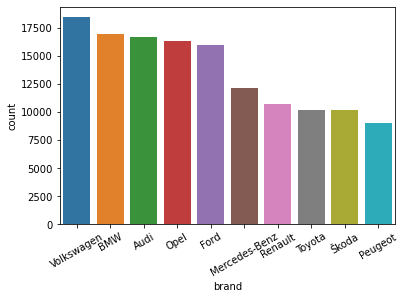

In [16]:
top10_brand = brand_count[0:10]
ax = sns.barplot(x = 'brand', y='count', data=top10_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

We can see that unsurprisingly, the manufacturer that sold the most number of cars is Volkswagen followed by BWM and Audi. This was to be expected since these are some of the wealthiest car maniufacturers in the world. Next, we will determine the revenue for each manufacturer and display the top 10 as we just did with number of sales. 

In [20]:
total_rev = df.groupby('Vehicle_brand')['Price'].sum()
total_rev = pd.DataFrame({'brand':total_rev.index, 'revenue':total_rev.values})
total_rev.head()

,brand,revenue
0,Abarth,3980714
1,Acura,1107349
2,Aixam,3024689
3,Alfa Romeo,93559151
4,Alpine,2028805


In [26]:
total_rev.sort_values(by=['revenue'], ascending=False, inplace=True)
total_rev.head()

,brand,revenue
9,BMW,1711970986
6,Audi,1552196114
59,Mercedes-Benz,1387460080
99,Volkswagen,970161766
30,Ford,760191527


[Text(0, 0, 'BMW'),
 Text(1, 0, 'Audi'),
 Text(2, 0, 'Mercedes-Benz'),
 Text(3, 0, 'Volkswagen'),
 Text(4, 0, 'Ford'),
 Text(5, 0, 'Škoda'),
 Text(6, 0, 'Opel'),
 Text(7, 0, 'Toyota'),
 Text(8, 0, 'Volvo'),
 Text(9, 0, 'Peugeot')]

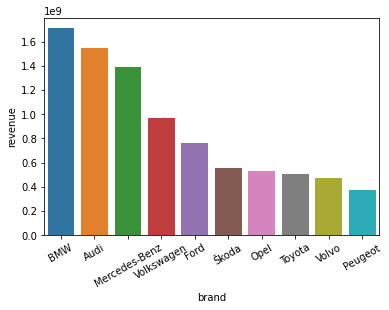

In [30]:
top10_rev = total_rev[0:10]
ax = sns.barplot(x = 'brand', y='revenue', data=top10_rev)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

As we can see, we find a similar list to the top 10 number of cars sold. However, they are not all in the same order. This tells us that there may not be an exact correlation between the number of cars sold and the profit made. Of course, we would need to obtain more information about gross and net profits gained from overhead costs per unit sold etc. Further analysis can be done here to uncover more relationships if more data is found. 

Next, lets look at some of the popular factors when buying a car and try to determine what the most popular kind of car is by colour, number of doors, and body type. We will, therefore, need to look at the most frequent combination of colour, numbers of doors, and body type.

In [74]:
df[['Doors_number','Type','Colour']].value_counts()

Doors_number  Type           Colour
5.0           SUV            black     10210
              station_wagon  black     10186
              SUV            white      7708
              station_wagon  silver     6781
              SUV            gray       6704
                                       ...  
4.0           small_cars     golden        1
                             gray          1
5.0           convertible    brown         1
              coupe          beige         1
55.0          station_wagon  black         1
Length: 506, dtype: int64

We can see here that the most frequently bought car is a black SUV with 5 doors. followed by a station wagon in the same colour. 

Next, we can use the numbers of features to determine if particular manufacturers provide better value for money i.e. which manufcaturers provide the most features for the lowest price. First, we will need to create a function to determine the number of features for each car/record. 

In [102]:
def num_features(x):
    
    num = x.split(',')
    
    return(len(num)-1)

Now we have created our function, we can apply it to the features column and create a new column with the number of features.

In [106]:
df['Number_of_features'] = df['Features'].apply(lambda x: num_features(x))

Next, we need to calculate the average number of features found for each manufacturer. To do this we can group by the manufacter and get the mean for the number of features.

In [116]:
features = df.groupby('Vehicle_brand')['Number_of_features'].mean()
features = pd.DataFrame({'brand':features.index, 'number of features':features.values})
features.sort_values(by=['brand'], ascending=True, inplace=True)
features.head()

,brand,number of features
0,Abarth,22.254237
1,Acura,37.437500
2,Aixam,3.891156
3,Alfa Romeo,28.033962
4,Alpine,32.000000


Next, we can compare the average price of a car sold by that manufacturer by the number of features to get a metric which will represent the number of features compared to cost. We will get the average cost per car from each manufacturer and add this to our feature dataframe.  

In [133]:
mean_price = df.groupby('Vehicle_brand')['Price'].mean()
mean_price = mean_price.sort_index()
mean_price = mean_price.values
features['mean_price'] = mean_price
features.head()

,brand,number of features,mean_price
0,Abarth,22.254237,67469.728814
1,Acura,37.437500,69209.312500
2,Aixam,3.891156,20576.115646
3,Alfa Romeo,28.033962,70610.680000
4,Alpine,32.000000,289829.285714


Finally, we can create a new column where we divide the average price by the number of features to get an average 'cost per feature' metric. The lowest this number, the greater number of features you are likely to get for your money. 

In [137]:
features['cost per feature'] = features['mean_price']/features['number of features']

In [145]:
features = features.sort_values(by=['cost per feature'], ascending=True)

Lets plot the top 10 manufacturers for value for money when it comes to features.

[Text(0, 0, 'Scion'),
 Text(1, 0, 'Rover'),
 Text(2, 0, 'Saab'),
 Text(3, 0, 'FAW'),
 Text(4, 0, 'Daihatsu'),
 Text(5, 0, 'Daewoo'),
 Text(6, 0, 'Saturn'),
 Text(7, 0, 'Lancia'),
 Text(8, 0, 'Tata'),
 Text(9, 0, 'Citroën')]

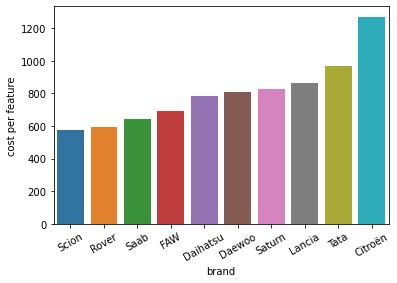

In [146]:
top10_features = features[0:10]
ax = sns.barplot(x = 'brand', y='cost per feature', data=top10_features)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In this case we see quite a different list to our previous bar plots. We can see that Scion, Rover and Saab are at the top of the score board when it comes to bang for your buck if you are looking for features!

There are obviously many more relationships we could draw from this dataset if wanted to. Such as any correlations between price and mileage, in which countries are particular vehicles sold most, and so on. Such exploration could uncover insight into social and demographic behaviours as well as the automotive market. 